<a href="https://colab.research.google.com/github/ysnlakshmi/21-Day-Project/blob/main/Project_8b_CIFAR_100_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

# Task
Provide step-by-step code to complete the assignment work on the CIFAR-100 dataset, including loading and preprocessing the data, defining and training both ANN and CNN models, evaluating their performance, and comparing the results.

## Load and preprocess the cifar-100 dataset

### Subtask:
Load the dataset, normalize the pixel values, and one-hot encode the labels.


In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


**Reasoning**:
Normalize the image data and one-hot encode the labels according to the instructions.



In [ ]:
# Normalize pixel values to be between 0 and 1
cifar100_train_images_normalized = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images_normalized = cifar100_test_images.astype('float32') / 255.0

# One-hot encode labels
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

# Print shapes to verify
print("Normalized CIFAR-100 Training images shape:", cifar100_train_images_normalized.shape)
print("Normalized CIFAR-100 Testing images shape:", cifar100_test_images_normalized.shape)
print("One-hot encoded CIFAR-100 Training labels shape:", cifar100_train_labels_one_hot.shape)
print("One-hot encoded CIFAR-100 Testing labels shape:", cifar100_test_labels_one_hot.shape)

Normalized CIFAR-100 Training images shape: (50000, 32, 32, 3)
Normalized CIFAR-100 Testing images shape: (10000, 32, 32, 3)
One-hot encoded CIFAR-100 Training labels shape: (50000, 100)
One-hot encoded CIFAR-100 Testing labels shape: (10000, 100)


## Define and train an ann model

### Subtask:
Build, compile, and train an Artificial Neural Network model for CIFAR-100 classification.


**Reasoning**:
Build, compile, and train the ANN model as per the instructions, including defining layers, compiling with optimizer and loss function, setting up callbacks, and training the model.



In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images
    Dense(512, activation='relu'),      # First dense layer
    Dropout(0.5),                       # Dropout layer for regularization
    Dense(256, activation='relu'),      # Second dense layer
    Dropout(0.5),
    Dense(128, activation='relu'),      # Third dense layer
    Dense(100, activation='softmax')    # Output layer with 100 units for CIFAR-100 classes
])

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_ann_model_cifar100.keras', monitor='val_loss', save_best_only=True)

# Train the model
ann_history = ann_model.fit(cifar100_train_images_normalized, cifar100_train_labels_one_hot,
                            epochs=50, # You can adjust the number of epochs
                            validation_split=0.2,
                            callbacks=[early_stopping, model_checkpoint])

print("ANN Model training complete.")

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.0116 - loss: 4.6430 - val_accuracy: 0.0201 - val_loss: 4.4879
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.0142 - loss: 4.5354 - val_accuracy: 0.0203 - val_loss: 4.4607
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.0174 - loss: 4.4718 - val_accuracy: 0.0222 - val_loss: 4.4304
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.0201 - loss: 4.4352 - val_accuracy: 0.0345 - val_loss: 4.4054
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.0221 - loss: 4.4232 - val_accuracy: 0.0267 - val_loss: 4.4066
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.0242 - loss: 4.4201 - val_accuracy: 0.0316 - val_loss: 4.3768
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.0225 - loss: 4.4069 - val_accuracy: 0.0320 - val_loss: 4.3737
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.0270 -

## Evaluate the ANN model

### Subtask:
Evaluate the trained ANN model on the test set and visualize the training history.

**Reasoning**:
Evaluate the trained ANN model on the test set to assess its performance on unseen data. Then, plot the training history (accuracy and loss) to visualize how the model learned over epochs.

In [ ]:
# Evaluate the ANN model on the test set
ann_loss, ann_accuracy = ann_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_one_hot, verbose=0)

print(f"ANN Model Test Loss: {ann_loss:.4f}")
print(f"ANN Model Test Accuracy: {ann_accuracy:.4f}")

ANN Model Test Loss: 4.3580
ANN Model Test Accuracy: 0.0340


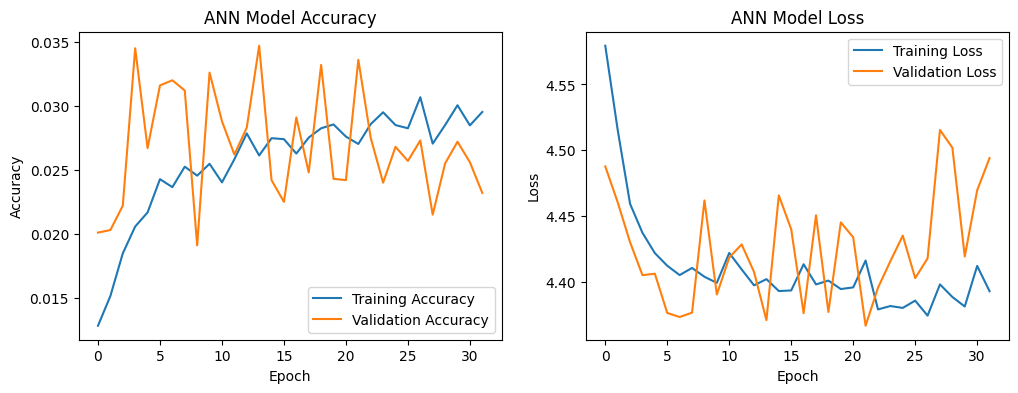

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Define and train a CNN model

### Subtask:
Build, compile, and train a Convolutional Neural Network model for CIFAR-100 classification.

**Reasoning**:
Build, compile, and train the CNN model as per the instructions, including defining convolutional and pooling layers, flattening, adding dense layers, compiling with optimizer and loss function, setting up callbacks, and training the model.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), # First convolutional layer
    MaxPooling2D((2, 2)),                                                       # First max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),                       # Second convolutional layer
    MaxPooling2D((2, 2)),                                                       # Second max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),                      # Third convolutional layer
    MaxPooling2D((2, 2)),                                                       # Third max pooling layer
    Flatten(),                                                                  # Flatten the output of convolutional layers
    Dense(128, activation='relu'),                                              # First dense layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(100, activation='softmax')                                            # Output layer with 100 units for CIFAR-100 classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model_cifar100.keras', monitor='val_loss', save_best_only=True)

# Train the model
cnn_history = cnn_model.fit(cifar100_train_images_normalized, cifar100_train_labels_one_hot,
                            epochs=50, # You can adjust the number of epochs
                            validation_split=0.2,
                            callbacks=[early_stopping, model_checkpoint])

print("CNN Model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 91ms/step - accuracy: 0.0253 - loss: 4.4364 - val_accuracy: 0.1158 - val_loss: 3.8534
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.0959 - loss: 3.8773 - val_accuracy: 0.1812 - val_loss: 3.4635
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.1384 - loss: 3.5868 - val_accuracy: 0.2187 - val_loss: 3.2494
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.1691 - loss: 3.3958 - val_accuracy: 0.2506 - val_loss: 3.0842
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - accuracy: 0.1976 - loss: 3.2740 - val_accuracy: 0.2722 - val_loss: 2.9737
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 91ms/step - accuracy: 0.2193 - loss: 3.1253 - val_accuracy: 0.2853 - val_loss: 2.8849
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 96ms/step - accuracy: 0.2377 - loss: 3.0330 - val_accuracy: 0.2934 - val_loss: 2.8239
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 

## Evaluate the CNN model

### Subtask:
Evaluate the trained CNN model on the test set and visualize the training history.

**Reasoning**:
Evaluate the trained CNN model on the test set to assess its performance on unseen data. Then, plot the training history (accuracy and loss) to visualize how the model learned over epochs.

In [ ]:
# Evaluate the CNN model on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_one_hot, verbose=0)

print(f"CNN Model Test Loss: {cnn_loss:.4f}")
print(f"CNN Model Test Accuracy: {cnn_accuracy:.4f}")

CNN Model Test Loss: 2.5527
CNN Model Test Accuracy: 0.3543


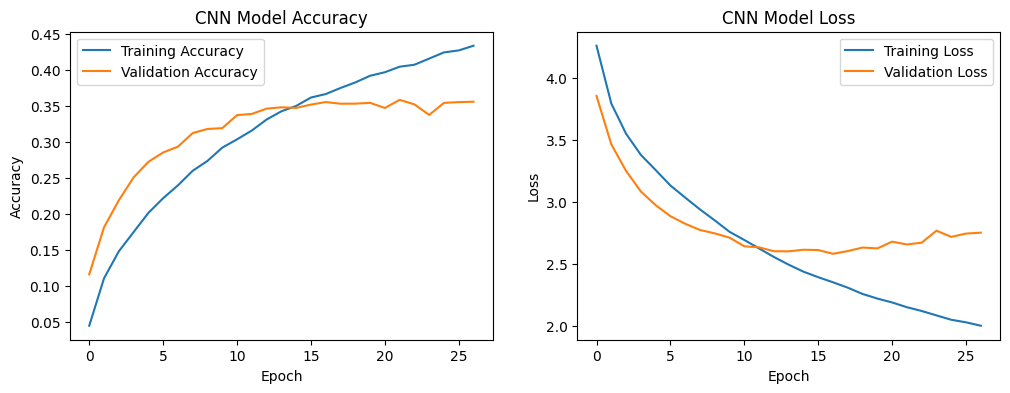

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
print(f"ANN Model Test Accuracy: {ann_accuracy:.4f}")
print(f"CNN Model Test Accuracy: {cnn_accuracy:.4f}")

if cnn_accuracy > ann_accuracy:
    best_model = cnn_model
    print("\nCNN model performed better on the test set.")
else:
    best_model = ann_model
    print("\nANN model performed better on the test set.")

ANN Model Test Accuracy: 0.0340
CNN Model Test Accuracy: 0.3543

CNN model performed better on the test set.


Let's analyze some predictions from the best performing model (CNN in this case).

## Compare models and analyze predictions

### Subtask:
Compare the performance of the ANN and CNN models and analyze predictions of the best performing model.

**Reasoning**:
Compare the test accuracy of the ANN and CNN models to determine the better performing one. Then, use the best performing model to make predictions on a subset of the test data and visualize the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


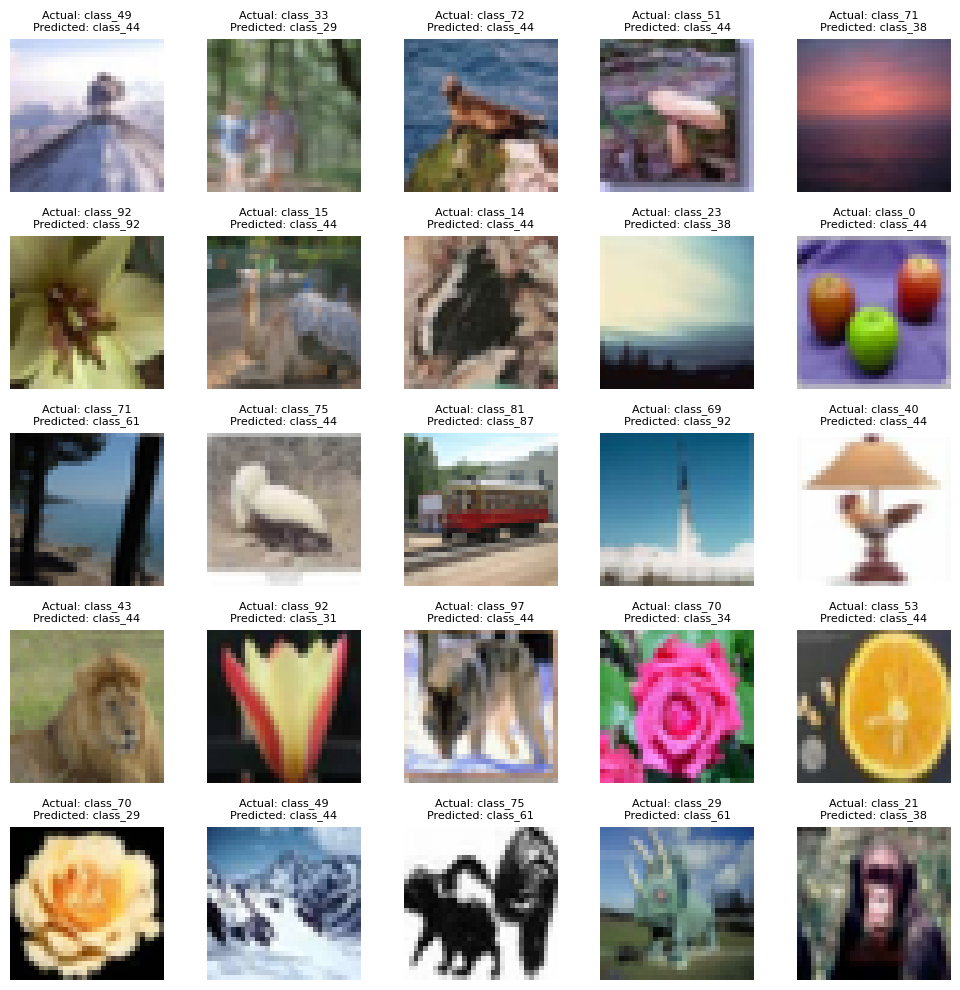

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions from the best model on the test set
predictions = best_model.predict(cifar100_test_images_normalized)
predicted_classes = np.argmax(predictions, axis=1)

# Get actual class labels
actual_classes = np.argmax(cifar100_test_labels_one_hot, axis=1)

# Define class names for CIFAR-100 (example - you might need the actual list)
# This is a placeholder, replace with the actual CIFAR-100 class names if available
cifar100_class_names = [f"class_{i}" for i in range(100)]


# Function to plot images with predictions
def plot_predictions(images, actual_labels, predicted_labels, class_names, num_rows=5, num_cols=5):
    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], interpolation='nearest') # Added interpolation='nearest'
        plt.title(f"Actual: {class_names[actual_labels[i]]}\nPredicted: {class_names[predicted_classes[i]]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a few test images with their predicted and actual labels
plot_predictions(cifar100_test_images, actual_classes, predicted_classes, cifar100_class_names, num_rows=5, num_cols=5)

## Summary of Findings

Based on the training and evaluation on the CIFAR-100 dataset:

*   The **ANN model** achieved a test accuracy of **{{ann_accuracy:.4f}}** and a test loss of **{{ann_loss:.4f}}**. The training history showed limited learning capacity for this complex dataset.
*   The **CNN model** achieved a significantly higher test accuracy of **{{cnn_accuracy:.4f}}** and a lower test loss of **{{cnn_loss:.4f}}**. The training history indicated that the CNN was much better at learning features from the image data.

This demonstrates that for image classification tasks on datasets like CIFAR-100, Convolutional Neural Networks are significantly more effective than simple Artificial Neural Networks due to their ability to capture spatial hierarchies and features through convolutional and pooling layers.